In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install mne

In [ ]:
!cp /content/drive/MyDrive/nuralnet/BCICIV_2a_gdf.zip /content

In [ ]:
%%capture
!unzip /content//BCICIV_2a_gdf.zip -d data

# From the Paper
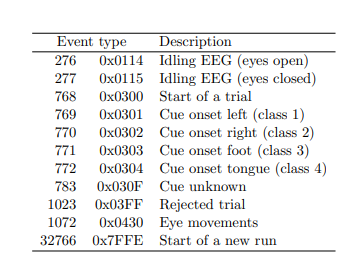

In [ ]:
## analyse the data
import mne

In [ ]:
raw=mne.io.read_raw_gdf('/content/data/A01T.gdf',eog=['EOG-left, EOG-central, EOG-right'])

Extracting EDF parameters from /content/data/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

<RawGDF | A01T.gdf, 22 x 672528 (2690.1 s), ~26 kB, data not loaded>

In [ ]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [ ]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [ ]:
events[0][0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

In [ ]:
event_dict ={
    'reject':1,
    'eye move':2,
    'eye open':3,
    'eye close':4,
    'new run':5,
    'new trail':6,
    'class  1':7,
    'class  2':8,
    'class  3':9,
    'class  4':10
}

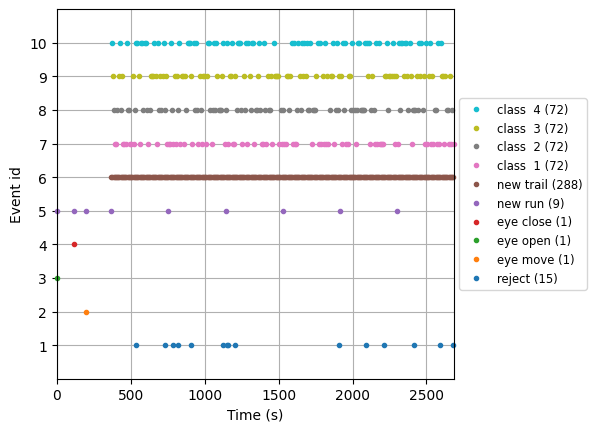

In [ ]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

In [ ]:
epochs = mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin = -0.1, tmax = 0.7)

Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


In [ ]:
epochs.get_data().shape

Loading data for 288 events and 201 original time points ...
0 bad epochs dropped


(288, 22, 201)

In [ ]:
labels = epochs.events[:,-1]

In [ ]:
labels

array([10,  9,  8,  7,  7,  8,  9, 10,  8,  9,  7,  7,  7, 10,  8,  8,  7,
        7,  9,  7,  8, 10, 10,  9,  7, 10, 10,  8, 10, 10,  8,  7,  8,  9,
        9,  9, 10,  9,  7, 10,  8,  9,  8,  9, 10,  8,  9,  7,  7,  7, 10,
        8,  7,  9,  7,  9,  8, 10,  7,  9,  9,  7,  9,  8, 10, 10, 10,  9,
        7, 10,  8, 10,  8,  7,  9,  8,  7,  9,  9,  7,  9, 10, 10,  8,  7,
        8, 10,  8, 10,  9,  8,  8,  8,  9, 10,  7,  8, 10,  7,  9,  9, 10,
        7,  7,  9,  8, 10, 10, 10,  8,  7,  9,  8, 10,  7, 10,  9,  8, 10,
       10,  7,  8,  8,  9, 10,  8,  7,  7, 10,  8,  7,  9,  8,  8,  9,  7,
       10,  9,  9,  9,  9,  7,  8,  7,  8,  7,  7,  9,  9,  8,  9, 10,  7,
       10,  7,  7,  8, 10,  9,  8, 10,  9, 10,  9, 10,  8,  8, 10,  7,  8,
        8,  8,  9, 10,  7, 10,  7,  9,  7, 10,  7,  9,  7,  8,  9,  9, 10,
        7,  8, 10,  8,  9,  9,  7, 10,  8, 10,  7,  7,  9,  9,  8, 10,  8,
        8,  7,  8, 10, 10,  8,  8,  8,  8, 10, 10,  9, 10,  7,  8,  9,  8,
        7, 10,  7, 10,  7

In [ ]:
evoked_1 = epochs['7'].average()
evoked_2 = epochs['8'].average()
evoked_3 = epochs['9'].average()
evoked_4 = epochs['10'].average()

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


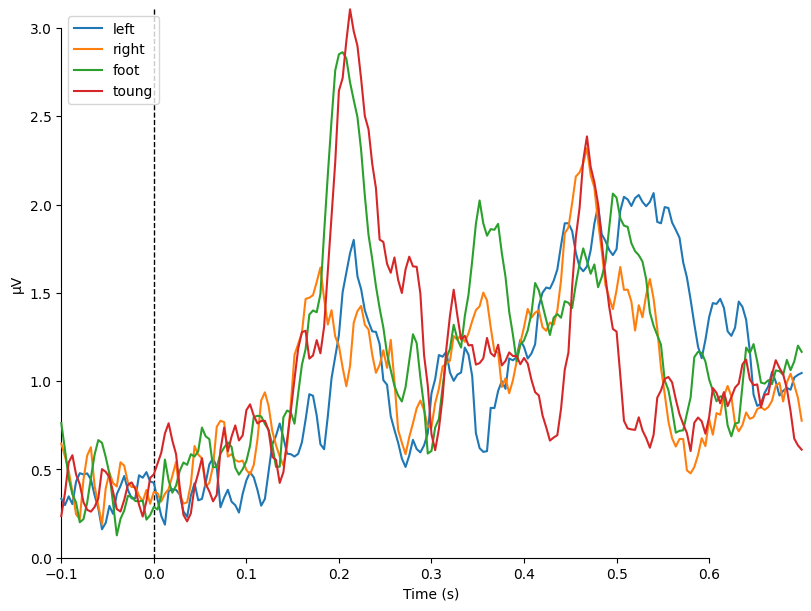

[<Figure size 800x600 with 1 Axes>]

In [ ]:
#left,right,foot,tongue
dicts={'left':evoked_1,'right':evoked_2,'foot':evoked_3,'toung':evoked_4}
mne.viz.plot_compare_evokeds(dicts)

In [ ]:
def read_data(path):
  raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  events=mne.events_from_annotations(raw)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],tmin = -0.1, tmax= 0.7, on_missing ='warn')
  labels=epochs.events[:,-1]
  features=epochs.get_data()
  return features,labels

In [ ]:
%%capture
features,labels,groups=[],[],[]
for i in range(1,10):
  feature,label=read_data(f'/content/data/A0{i}T.gdf')
  features.append(feature)
  labels.append(label)
  groups.append([i]*len(label))


In [ ]:
import numpy as np
features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)

features.shape,labels.shape,groups.shape

((2448, 22, 201), (2448,), (2448,))

In [ ]:
np.isnan(features).sum()

0

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
unique, counts

(array([ 7,  8,  9, 10]), array([648, 648, 576, 576]))